In [1]:
import numpy as np
import matplotlib.pyplot as plt
def age(p = 1, a_mperyear = 0.01):   #  
    # time domain
    dt_years = 10                                 # time step in years
    seconds_per_year = 365*24*60*60               # approximate number of seconds in year
    dt = dt_years*seconds_per_year                # time step in seconds
    time_total_years = 8e4                        # total length of the simulation in years
    T = time_total_years*seconds_per_year;        # total length of the simulation in seconds
    time = np.linspace(0,T,round(T/dt))           # the time grid, units [years]

    # space domain
    grid_spacing = 10                             # grid spacing, units [m]
    ice_thickness = 753                           # The max depth of the Roosevelt Age depth profile
    depth = np.linspace(0,ice_thickness,round(ice_thickness/grid_spacing))  # spatial grid, units [m]

    # vertical velocity
    accumulation_rate = a_mperyear/seconds_per_year
    vertical_velocity = -accumulation_rate*(1-(p+2)/(p+1)*(depth/ice_thickness) + 1/(1+p) *(depth/ice_thickness)**(p+2))
    
    # initial condition 
    Age = np.zeros((time.size,depth.size)) 
    
    # main loop
    for timestep in np.arange(1,time.size):
        Age[timestep,1:] = Age[timestep-1,1:]  + dt * \
            ((vertical_velocity[1:] + vertical_velocity[:-1])/2   * \
            (Age[timestep-1,1:]-Age[timestep-1,:-1])/grid_spacing + 1 )   
    
    # return values
    Age_years = Age/seconds_per_year  
    return Age_years, time, depth

# run the model
Age, time, depth = age()     

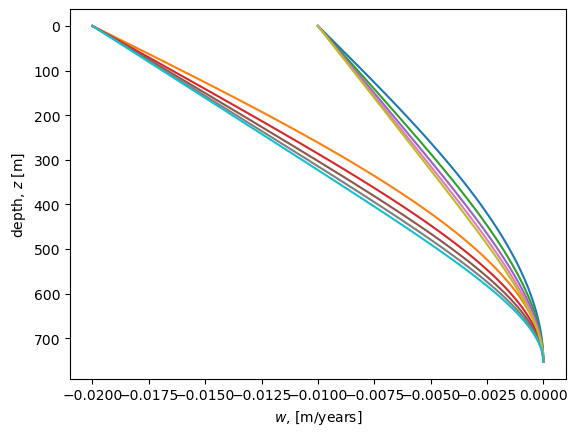

In [6]:
def plot_w(p_in, a_in, depth, ice_thickness):
    fig, ax = plt.subplots()
    for p in p_in:
        for a in a_in:
            vertical_velocity = -a*(1-(p+2)/(p+1)*(depth/ice_thickness) + 1/(1+p) *(depth/ice_thickness)**(p+2))

            ax.plot(vertical_velocity,depth)
            ax.set_xlabel('$w$, [m/year]')
            ax.set_ylabel('depth, $z$ [m]');
        
    ax.invert_yaxis()
plot_w([1, 2, 3, 4, 5], [0.01, 0.02], depth, depth[-1])

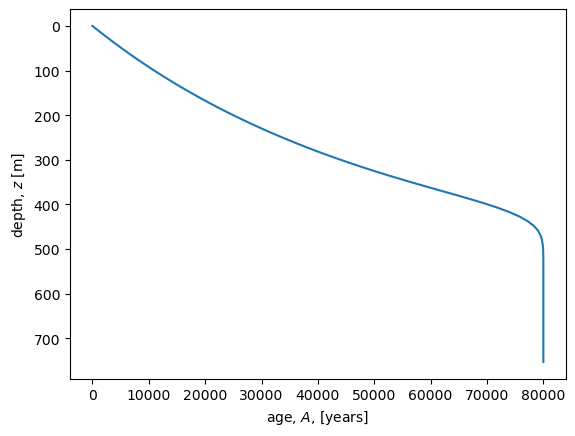

In [7]:
fig, ax = plt.subplots()

ax.plot(Age[-1,:],depth)
ax.set_xlabel('age, $A$, [years]')
ax.set_ylabel('depth, $z$ [m]');
ax.invert_yaxis()

In [131]:
## Use this code to plot an animation of your model results. 

# imports: you may need to import `conda install ipympl`
%matplotlib widget
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')

def animate_ice_model_results(z, t, f, interval_between_timesteps = 500, time_delay_between_frames = 100):
    # run this function by, e.g., `animate_ice_model_results(x, t, H)`

    # open a figure and an axes inside the figure
    fig, ax = plt.subplots()

    # set the limits of the axes
    ax.set_ylim(( z[0], z[-1]))    # the vertical axis will go from 0 to H
    ax.set_xlim((np.min(f), np.max(f)))   # the horizontal axis will got from lowest T to the highest T
    ax.invert_yaxis()

    # create an line object with no data, and suppress the plot 
    line, = ax.plot([], [], lw=2);
    plt.close()
    seconds_per_year = 365*24*60*60
    # define a function which updates the figure, given a timestep number. This function plots the line and updates the axis labels. 
    def animate(timestep):
        line.set_data(f[timestep,:], z)                 # update the data
        ax.set_title(f"$t$ = {t[timestep]/seconds_per_year:.1f} years")  # update the title
        ax.set_ylabel("depth, $z$ [m]")              # update the x label
        ax.set_xlabel("age, $A$, [years]")  # update the y label, change this if you want to plot something other than ice surface height
        return line

    # setup the animation 
    anim = animation.FuncAnimation(fig, animate, 
                                   frames = np.arange(0, len(t), interval_between_timesteps),
                                   interval = time_delay_between_frames, 
                                   blit=True)
    
    return anim

In [165]:
animate_ice_model_results(depth, time, Age, interval_between_timesteps = 100)

## Download data
Download RICE17_Interpolated_Ages_20180923.txt from here https://www.usap-dc.org/view/dataset/601359. 

![title](https://www.researchgate.net/publication/332337087/figure/fig1/AS:746311796137984@1554946006579/a-b-Roosevelt-Island-is-located-in-the-eastern-sector-of-the-Ross-Ice-Shelf-embayment.jpg)

Citation for figure: Winstrup, Mai & Vallelonga, Paul & Kjær, Helle & Fudge, Tyler & Lee, James & Riis, Marie & Edwards, Ross & Bertler, N. & Blunier, Thomas & Brook, Ed & Buizert, C. & Ciobanu, Gabriela & Conway, H. & Dahl-Jensen, Dorthe & Ellis, Aja & Emanuelsson, Daniel & Hindmarsh, Richard & Keller, Elizabeth & Kurbatov, Andrei & Wheatley, Sarah. (2019). A 2700-year annual timescale and accumulation history for an ice core from Roosevelt Island, West Antarctica. Climate of the Past. 15. 751-779. 10.5194/cp-15-751-2019. 

## Load the data

In [166]:
data = np.loadtxt('/Users/jkingslake/Documents/teaching/Glaciology/2023/practicals/glaciology_practical/data/RICE17_Interpolated_Ages_20180923.txt', 
                  skiprows = 29,
                  encoding = 'latin-1')
depth_measured = data[:,0]
age_measured = data[:,1]

In [183]:
age_measured

array([        nan, -6.1000e+01, -5.9000e+01, ...,  8.2180e+04,
        8.2837e+04,         nan])

## Plot the measured age profile

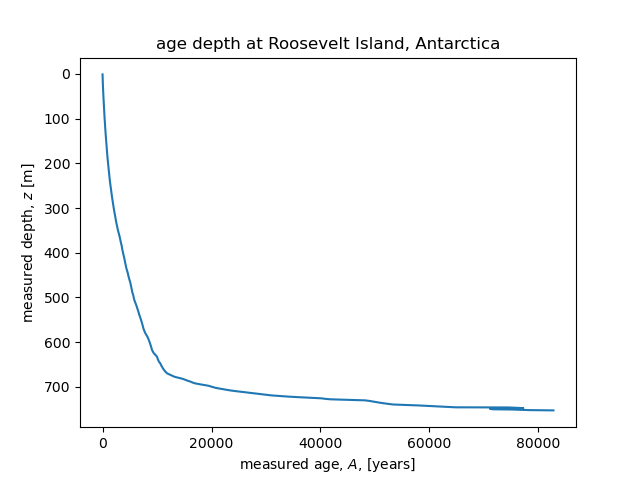

In [134]:
fig, ax = plt.subplots()

ax.plot(age_measured,depth_measured)
ax.set_xlabel('measured age, $A$, [years]')
ax.set_ylabel('measured depth, $z$ [m]');
ax.set_title('age depth at Roosevelt Island, Antarctica');
ax.invert_yaxis()

## Plot a modelled profile over the measured profile

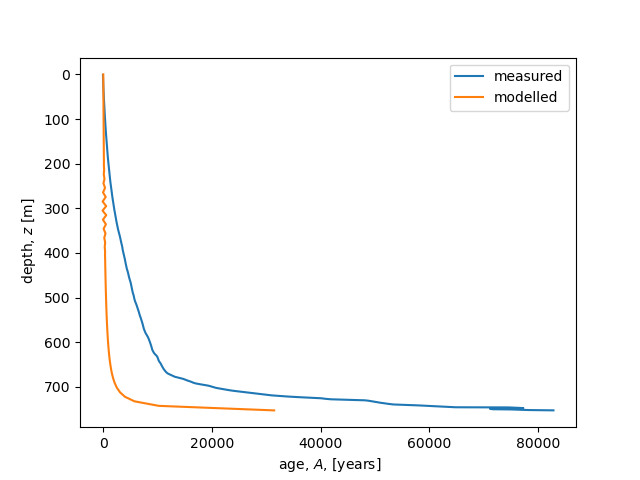

In [187]:
A_modelled, time_modelled, depth_modelled = age(p = 3, a_mperyear = 2) 
fig, ax = plt.subplots()

ax.plot(age_measured, depth_measured, label = 'measured')
ax.plot(A_modelled[-1,:], depth_modelled, label = 'modelled')
ax.legend()
ax.set_xlabel(' age, $A$, [years]')
ax.set_ylabel(' depth, $z$ [m]');
ax.invert_yaxis()

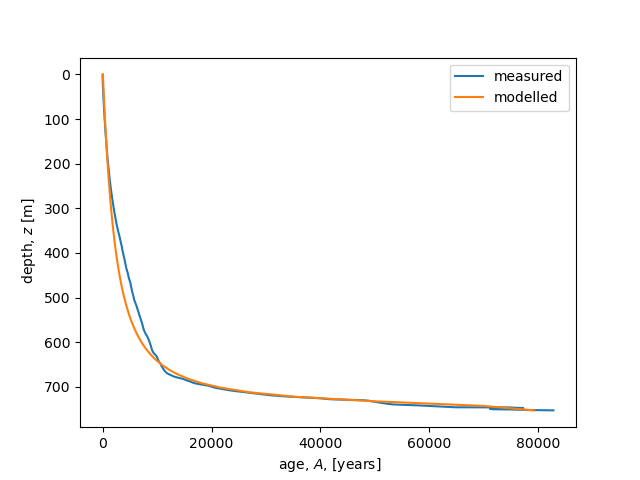

In [182]:
def run_and_plot(p = 1.8, a_mperyear = 0.28):

    A_modelled, time_modelled, depth_modelled = age(p = p, a_mperyear = a_mperyear)   

    fig, ax = plt.subplots()

    ax.plot(age_measured, depth_measured, label = 'measured')
    ax.plot(A_modelled[-1,:], depth_modelled, label = 'modelled')
    ax.legend()
    ax.set_xlabel(' age, $A$, [years]')
    ax.set_ylabel(' depth, $z$ [m]');
    ax.invert_yaxis()
run_and_plot()

## Decide on a way to measure mismatch
For example, the root-mean-squared mismatch over each of the data points: 

$$
\sqrt{\sum_{i=1}^n\frac{(A^i_{modelled}-A^i_{measured})^2}{n}}.
$$

To make the comparison, we will need to interpolate the modelled values at the depths of the data. 

In [136]:
def modelled_age_interpolated_at_datapoints(depth_measured, depth_modelled, A_modelled):
    return np.interp(depth_measured, depth_modelled, A_modelled)

In [137]:
age_interpolated = modelled_age_interpolated_at_datapoints(depth_measured, depth_modelled, A_modelled[-1,:])

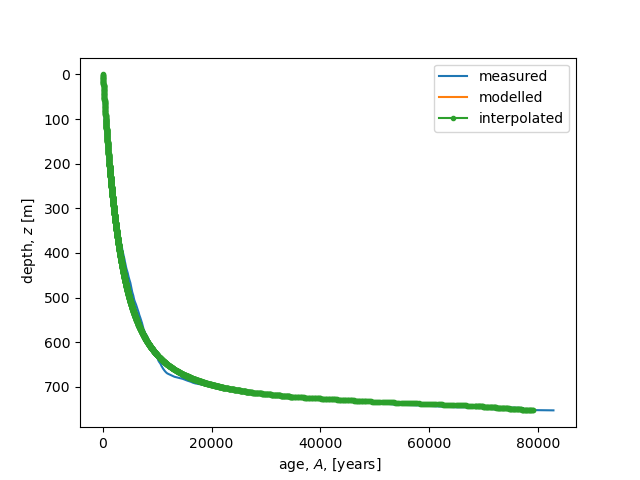

In [138]:
fig, ax = plt.subplots()

ax.plot(age_measured, depth_measured, label = 'measured')
ax.plot(A_modelled[-1,:], depth_modelled, label = 'modelled')
ax.plot(age_interpolated, depth_measured, marker = '.', label = 'interpolated')

ax.legend()
ax.set_xlabel(' age, $A$, [years]')
ax.set_ylabel(' depth, $z$ [m]');
ax.invert_yaxis()

Now let's compute the RMS

In [139]:
def root_mean_square_mismatch(age_interpolated, age_measured):
    return np.sqrt(np.nanmean((age_interpolated - age_measured)**2))

In [140]:
RMS = root_mean_square_mismatch(age_interpolated, age_measured)
RMS

1778.5741282003903

Now let's bring it all together

In [188]:
def run_model_return_mismatch(inputs):
    
    #print(inputs)
    A_modelled, time_modelled, depth_modelled = age(p = inputs[0], a_mperyear = inputs[1])
    
    age_interpolated = modelled_age_interpolated_at_datapoints(depth_measured, depth_modelled, A_modelled[-1,:])
      
    RMS = root_mean_square_mismatch(age_interpolated, age_measured)
    print(f"RMS = {RMS}")
    return RMS

    

In [189]:
run_model_return_mismatch((1,1))

RMS = 10582.78400865543


10582.78400865543

In [191]:
import scipy.optimize
optimal_solution = scipy.optimize.minimize(run_model_return_mismatch, (1,1), method = 'nelder-mead')



RMS = 10582.78400865543
RMS = 10688.312822336617
RMS = 10938.545845461758
RMS = 10305.721188442727
RMS = 9944.182746932522
RMS = 9833.785598710072
RMS = 9348.171840628844
RMS = 8474.369426318211
RMS = 6935.306475292596
RMS = 5974.807593939216
RMS = 2752.9919536168595
RMS = 9434.802018867871
RMS = 7584.227361058148
RMS = 2028.3050197870123
RMS = 9434.802018867871
RMS = 14862.255335833337
RMS = 4795.012854088926
RMS = 4738.343266192204
RMS = 2393.794721543916
RMS = 4384.078778847616
RMS = 2168.1646683742497
RMS = 2766.301599304049
RMS = 2067.050124067672
RMS = 2295.8660013697245
RMS = 2058.8166256839077
RMS = 2173.59502424272
RMS = 2032.2392391132437
RMS = 2041.1385014087887
RMS = 2028.5913421311266
RMS = 2019.5126493336597
RMS = 2016.8641542190865
RMS = 2048.4704652807222
RMS = 2021.4682274377913
RMS = 2009.0184028261474
RMS = 2001.578861808767
RMS = 1994.0773968762255
RMS = 1981.6096346044856
RMS = 1967.8750758282013
RMS = 1955.1908980192227
RMS = 1922.875557090645
RMS = 1889.818458658

In [192]:
optimal_solution

 final_simplex: (array([[5.40123575, 0.18608836],
       [5.40133322, 0.18608731],
       [5.40113935, 0.18609092]]), array([1448.40671115, 1448.40671137, 1448.40671241]))
           fun: 1448.406711154499
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 70
        status: 0
       success: True
             x: array([5.40123575, 0.18608836])

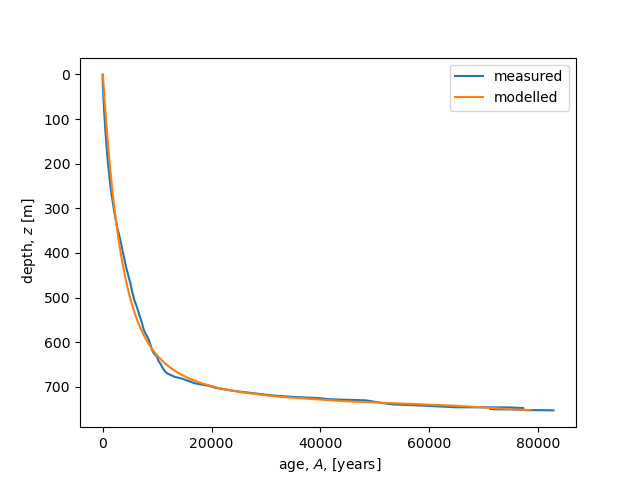

In [193]:
run_and_plot(optimal_solution.x[0], optimal_solution.x[1])